# Standard deviations and standard errors in python

This notebook is just to clarify definitions.

# Imports

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

The function `numpy.std()` returns (by default) the _population_ standard deviation:
$$\sigma_0 := \sqrt{\frac1n\sum_{i=1}^n(x_i-\overline x)^2}\,.$$
In order to obtain the _sample_ standard deviation, set the parameter `ddof=1` to get
$$\sigma_1 := \sqrt{\frac1{n-1}\sum_{i=1}^n(x_i-\overline x)^2}\,.$$
The **standard error of the means** is 
$$\text{se} := \frac{\sigma_1}{\sqrt{n}}\,.$$

From wikipedia:
>  the standard error of the mean can also be understood as the standard deviation of the error in the sample mean with respect to the true mean.

# Population vs sample standard deviation

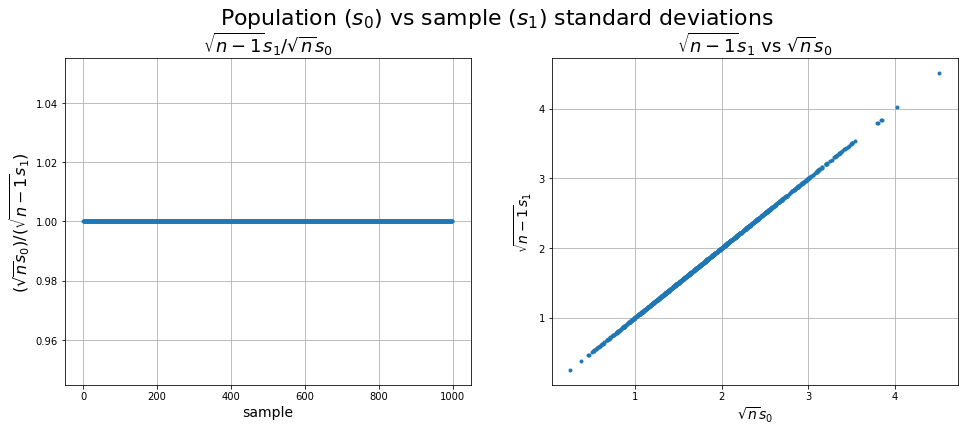

In [2]:
np.random.seed(42)

# Parameters (samples)
nb_samples = 1_000
sample_size = 5

# Samples
samples = scipy.stats.norm.rvs(size=(nb_samples, sample_size))

sum2 = (samples**2).sum(axis=1)

ddof0 = 0
df0 = sample_size - ddof0
s0 = samples.std(axis=1, ddof=ddof0)

ddof1 = 1
df1 = sample_size - ddof1
s1 = samples.std(axis=1, ddof=ddof1)

# Visualation
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].plot(np.sqrt(df0)*s0/(np.sqrt(df1)*s1), '.');
axs[0].set_xlabel("sample", fontsize=14)
sqrtn0 = '$\sqrt{n}$' 
sqrtn1 = '$\sqrt{n-1}$'
axs[0].set_ylabel(f"({sqrtn0}$s_0$)/({sqrtn1}$s_1$)", fontsize=16)
axs[0].set_title(f'{sqrtn1}$s_1$/{sqrtn0}$s_0$', fontsize=18)

axs[1].plot(np.sqrt(df0)*s0, np.sqrt(df1)*s1, '.')
axs[1].set_title(f'{sqrtn1}$s_1$ vs {sqrtn0}$s_0$', fontsize=18)
axs[1].set_xlabel(f'{sqrtn0}$s_0$', fontsize=14)
axs[1].set_ylabel(f'{sqrtn1}$s_1$', fontsize=14)

fig.suptitle(f'Population ($s_0$) vs sample ($s_1$) standard deviations', fontsize=22, y=1)

for ax in axs:
    ax.grid(True)

# Standard error of the mean vs sample standard error

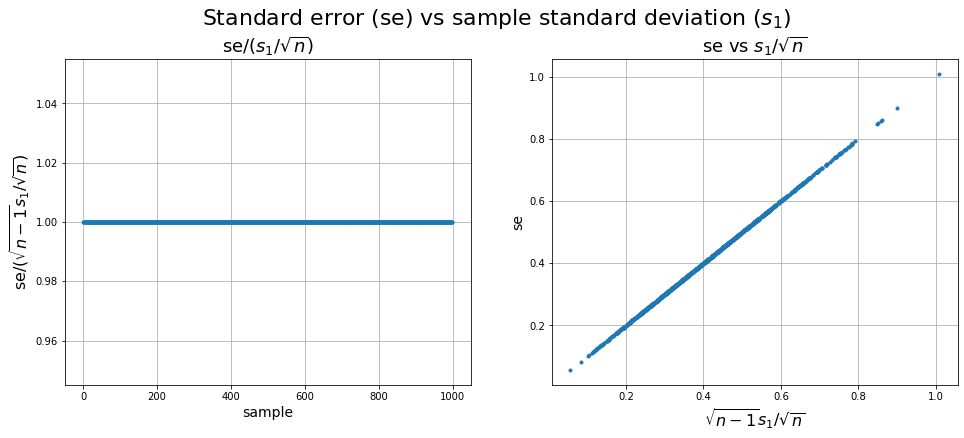

In [3]:
np.random.seed(42)

# Parameters (samples)
nb_samples = 1_000
sample_size = 5

# Samples
samples = scipy.stats.norm.rvs(size=(nb_samples, sample_size))

ddof1 = 1
df1 = sample_size - ddof1
s1 = samples.std(axis=1, ddof=ddof1)

sems = scipy.stats.sem(samples, axis=1, ddof=ddof1)

# String formatting
sqrtn0 = '$\sqrt{n}$'
sqrtn1 = '$\sqrt{n-1}$'

# Visualization
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(sems/(s1/np.sqrt(sample_size)), '.');
axs[0].set_xlabel("sample", fontsize=14)
axs[0].set_ylabel(f"se/({sqrtn1}$s_1$/{sqrtn0})", fontsize=16)
axs[0].set_title(f'se/($s_1$/{sqrtn0})', fontsize=18)

axs[1].plot(s1/np.sqrt(sample_size), sems, '.')
axs[1].set_xlabel(f'{sqrtn1}$s_1$/{sqrtn0}', fontsize=16)
axs[1].set_ylabel('se', fontsize=14)
axs[1].set_title(f'se vs $s_1$/{sqrtn0}', fontsize=18)

fig.suptitle(f'Standard error (se) vs sample standard deviation ($s_1$)', fontsize=22, y=1)

for ax in axs:
    ax.grid()